### Bayesian Network
---
<div style="text-align:right"><strong>김연진</strong></div>

### 개요
- 이론: 문일철 교수님 인공지능 및 기계학습 개론 2 - Chapter 7 요약 +@
- 실습: 라이브러리를 활용한 튜토리얼 형태의 연습용 코드
- Graphical Model에 속함

### 순서
1. 확률
2. 베이지안 네트워크 이해
3. 베이지안 네트워크 확률 변수들 간 관계 파악 방법




### 참고
- [Frequentist 대 Bayesian] https://www.probabilisticworld.com/frequentist-bayesian-approaches-inferential-statistics/
- [다운로드 시 참고] https://stackoverflow.com/questions/28431350/create-bayesian-network-and-learn-parameters-with-python3-x

<br>

---

<br>
<h1 style="text-align:center">1. 확률의 기초 </h1>

### 1.1 확률의 두 가지 기준
1. Frequentist의 관점
2. Bayesian의 view

<div style="text-align:right">참고: [Frequentist 대 Bayesian] https://www.probabilisticworld.com/frequentist-bayesian-approaches-inferential-statistics/ </div>



### 1.2 복습
 - P(A=true)는 A=true가 일어날 확률
 - 확률: relative frequency (사건이 발생하는 상대적인 빈도로 확률을 표현함)


 - **조건부 확률 (conditional Probability)**
    - 주어진 조건 하에 어떤 사건이 발생할 확률에 더 관심 있음
    - **P(A=true | B=true)**: B=true일 때 A=true 일 확률
    - B=true가 전체 부분이라고 보고 그 안에서 A=true인 것의 확률
    
- **Joint Probability** (중요)
    - P(A=true, B=true)는 A=true and B=true 라는 뜻
    - P(X|Y) = P(X,Y) / P(Y)

- **Total Probability**
    - P(a) = ∑bP(a, b) = ∑bP(a | b) P(b)
    - 첫 번째 등호: B가 true일 때와 false일 때를 모두 합하므로 B와는 무관해져서 P(A)와 같아진다
    - 두 번째 등호: P(X|Y) = P(X,Y) / P(Y) 이용
    - joint를 알면 marginalization을 통해 개별에 대해서도 알 수 있다
    - 변수가 늘어나면 알아야 하는 변수 많아져서 계산이 곤란 (Naive Bayes 참고)

- **Chain Rule**
    - P(a, b, c, … z) = P(a | b, c, …. z) P(b, c, … z)
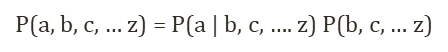

- **Independence**
    - P(A|B) = P(A) 인 경우 독립이다 (B와 상관 없이 A가 발생한다)
    - P(A,B) = P(A)P(B)
    - P(B|A) = P(B)
    - Marginal Independence
        - P(X) = P(X|Y)
        - 앞의 정의와 동일
    - Conditional Independence
        - P(A|B,C) = P(A|C)
        - C가 given인 상황에서는 B에 대해 A가 independent하다
        - Condition이 붙는 Independence


<br>
<hr>

<h1 style="text-align:center"> 2. Bayesian Network </h1>

### 2.1 Naive Bayes Classifier
![naive-bayes.png](./00-naive-bayes.png)
- "Y가 given인 상황에서 개별 input feature들은 conditionally independent하다"라는 naive한 가정
- Graphical Notaion으로 표현 ==> Bayesian Network 등장

<br>
### 2.2 Bayesian Network
- random variable의 full joint distribution을 가장 compact하게 표현할 수 있는 방법
- 노드와 링크(그래프)로 표현

![bayes network.png](./01-bayes-network.png "bayes network")


- Acyclic Directed 그래프
- 노드
    - random variable
    - P (Xi|Parents(Xi))

- 네트워크의 위상(topology)은 조건부 독립 관계를 가정한다

- Qualitive Components (구조 차원의 정보)
    - 선행 지식이 있고, 그래프(네트워크)에 표현
    - 데이터를 통해 지식 획득
    - 전문가 등으로부터 지식 획득

- Quantative Components (수치적인 정보)
    - Conditional Probability table (이산적(Descrete)인 value에 대해서만 가능, Continuous한 value는 function의 형태로)
    

### 2.3 Typical Bayes Network Structure

<br>
<center>
<img src="02-typical-1.png" width="700" height="100"> </img>
- A를 알면 J와 M은 독립

<img src="02-typical-2.png" width="700" height="100"> </img>
    - A가 주어졌을 때 B와 M은 독립

<img src="02-typical-3.png" width="700" height="100"> </img>
    - A가 주어지면 B와 E의 관계가 생김<br>
    - A를 알게 되면 B가 E인지 판단하기 위한 정보를 제공함
</center>

### 2.4 Bayes Ball Algorithm
1. 목적
    - 특정 variable 하나와 다른 random variable 하나가 독립인지 판단
    - 무언가가 given인 상황에서 한 vaiable이 다른 variable이 독립인지 판단


2. 방법
    - 공을 A에서 굴려서 B에 가면 A와 B는 independent하지 않다
    - 공이 엣지에 연결된 노드로 굴러가서 도달 가능하지 않으면 independent
    - Common Parent, Cascading: 중간에 given인 정보가 있으면 더이상 굴러갈 수 없음
    - V-structure: 중간에 있는(자식) 노드가 given이면 연결통로가 생김


3. Markov Blanket
    - P(A|blanket, B)=P(A|blanket)
    - Blanket={parents, children, children’s other parents}
    - parents, children: Commen Parent, Cascading인 경우에 independent 보장
    - children's other parents: V-structure인 경우에 independent 보장
    - blanket에 대해 condition을 할 수 있으면 그 외(담요 바깥)의 것들에 대해 conditional independent


4. D-Seperation (Directed Seperation)
    - X is D-seperated from Z given Y
    - X⊥Z | Y


### 2.5 Factorization of Bayes Network
- 변수가 많아지므로 줄이기 위해 independent에 대한 정보가 필요
- Bayesian Network를 활용
- 𝑃(𝑋)=∏_𝑖 𝑃(𝑋_𝑖 |𝑋_(𝜋_𝑖 ))
![image.png](./03-factorization.png)


### 2.6 Plate Notation
- 접시를 만들어서 마지 for loop처럼 보고 박스(plate)와 한 변수가 연결돼있으면 plate 안에 들어있는 X1 ~ Xn까지 다 연결돼있다고 봄

<br><br><br><hr><br>
<h1 style="text-align:center"> 3. Inference of Bayesian Network </h1>
<br>

- Parameter를 계산 (calculate parameters)
- 정확한(exact) 추론값을 나열 (list the exact inference of Bayesian Network)

<br>
## 3.0 예시

- 예측(Prediction): P(A | B,E) ==> A가 true or false
- 진단(Diagnosis): P(B,E | A) ==> 4가지 케이스

<br>

## 3.1 Marginalization and Elimination
- 문제를 full joint가 있는 방향으로 이끌어감
- full joint를 한 다음 --> marginallize함 --> partial의 joint로 만듦 --> Confitional Probability, ...


- 덧셈과 곱셈을 잔뜩 하기 (Brute-Force)
- Bayesian Network와 factorization 공식 활용해서 풀 수 있는 형태의 식을 얻어냄
- 실제 값들(표)을 대입해서 식을 계산 가능
- p.7


- 더 좋은 방법은 없을까?
- 상수에 해당하는 값들을 시그마 밖(앞)으로 보낸다
- 계산량 감소


<br>

## 3.2 Variable Elimination

- 구하고자하는 정보를 베이지안 네트워크로 표현한 것(그래프)를 위상정렬한 순서(topological order)로 표현
- function Notation으로 바꿔서 표현
- ==> 어떤 변수들에 대해서 테이블 하나로 축약 가능 (테이블 곱셈 - full joint) ==> 변수 줄어듦
- 나중에 계산할 때에는 새로 만든 테이블에만 접근하면 됨

<br>

## 3.3 Potential Functions
- **Potential Function**:
    - 잠재력은 있지만 아직 PDF(Probability Distributed Function)는 아닌 function
    - a function which is not a probability function yet, but once normalized it can be a probability distribution function
- **Clique**: fully connected된 subgraph(subset) (subgraph에 포함되는 노드에 fully connected된 것을 말함)
- **Separator**: Clique들에 공통으로 들어가서 연결해주는 노드

- 각 Clique에 potential function 정의하기 -- 𝜓(𝑎,𝑏) 형태
- 각 link에 대한 potential function -- 𝜙(𝑏) 형태
- 𝑃(𝐴,𝐵,𝐶,𝐷) 를 potential function들로 표현 가능


- potential function들로 표현한 식이 P(A,B,C,D) = P(A|B)P(B|C)P(C|D)P(D)라는 식과 연결되도록 함
- conditional probability나 joint를 이용
- joint를 이용하는 것이 더 직관적이지만, 실제로 가지고 있는 정보는 conditional 정보


<br>
## 3.4 Absorption in Clique Graph
- **Belief Propagation**
    - observation이 Clique와 Link를 통해서 propagate

- absorption(update) rule
    - 업데이트되는 과정: 𝜓∗(𝐵,𝐶) = 𝜓(𝐵,𝐶) X 𝜙∗(𝐵) / 𝜙(𝐵)
    - 𝜓(𝐵,𝐶): 기존의 potential function
    - 𝜙∗(𝐵):  새로이 등장한 𝜓를 marginalize out해서 새롭게 만들어낸 potential function
    - 𝜙(𝐵): 예전에 잡아놨던(기존의) separater의 potential function
    - local consistency를 보장


<br>

---
<br>
<h1 style="text-align:center"> 튜토리얼 </h1>

### 설치
- 참고: http://www.bayespy.org/user_guide/install.html
- 여러가지 라이브러리가 있지만 이번 튜토리얼에서는 bayespy를 이용해보자

In [1]:
!pip install bayespy

  Running setup.py bdist_wheel for bayespy: started
  Running setup.py bdist_wheel for bayespy: finished with status 'done'
  Stored in directory: C:\Users\young\AppData\Local\pip\Cache\wheels\1d\db\31\e5fd5f3a154a21a29ceb8b15d689d98436b5a3f418782f569b
Successfully built bayespy


distributed 1.21.8 requires msgpack, which is not installed.
catboost 0.9.1.1 requires enum34, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### Examples
http://bayespy.org/examples/examples.html

#### Data

In [1]:
import numpy as np
k = 2 # slope
c = 5 # bias
s = 2 # noise standard deviation

In [2]:
x = np.arange(10)
y = k*x + c + s*np.random.randn(10)

#### Model

In [3]:
X = np.vstack([x, np.ones(len(x))]).T

In [4]:
from bayespy.nodes import GaussianARD
B = GaussianARD(0, 1e-6, shape=(2,))

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
from bayespy.nodes import SumMultiply
F = SumMultiply('i,i', B, X)

In [6]:
from bayespy.nodes import Gamma
tau = Gamma(1e-3, 1e-3)

In [7]:
Y = GaussianARD(F, tau)

#### Inference

In [8]:
Y.observe(y)

In [9]:
from bayespy.inference import VB
Q = VB(Y, B, tau)

In [10]:
Q.update(repeat=1000)

Iteration 1: loglike=-4.312744e+01 (0.003 seconds)
Iteration 2: loglike=-4.258458e+01 (0.003 seconds)
Iteration 3: loglike=-4.257494e+01 (0.003 seconds)
Iteration 4: loglike=-4.257459e+01 (0.003 seconds)
Converged at iteration 4.


#### Results

In [11]:
xh = np.linspace(-5, 15, 100)
Xh = np.vstack([xh, np.ones(len(xh))]).T
Fh = SumMultiply('i,i', B, Xh)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


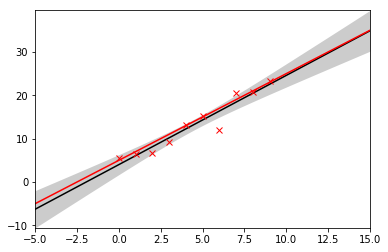

In [12]:
import bayespy.plot as bpplt
bpplt.pyplot.figure()
bpplt.plot(Fh, x=xh, scale=2)
bpplt.plot(y, x=x, color='r', marker='x', linestyle='None')
bpplt.plot(k*xh+c, x=xh, color='r');

#### Accuracy

In [13]:
from bayespy.nodes import GaussianGamma
B_tau = GaussianGamma(np.zeros(2), 1e-6*np.identity(2), 1e-3, 1e-3)

In [14]:
F_tau = SumMultiply('i,i', B_tau, X)

In [15]:
Y = GaussianARD(F_tau, 1)

In [16]:
Y.observe(y)
Q = VB(Y, B_tau)
Q.update(repeat=1000)

Iteration 1: loglike=-4.381545e+01 (0.003 seconds)
Iteration 2: loglike=-4.381545e+01 (0.003 seconds)
Converged at iteration 2.


<br><hr>
## 더 알아보고 싶다면
- https://www.edwith.org/bayesiandeeplearning